K Longnecker, 29 June 2017: new notebook to use Python to plot up the replicates

In [1]:
if False:
    %reset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.debugger import Tracer 

In [3]:
mtabFile = 'Chisholm_TSQ_R1andPL1_cellSpecific.2017.06.29.csv' #first column is KEGG C number
getNames=pd.read_csv(mtabFile,sep = ',').T

In [4]:
r = getNames.shape

In [5]:
mtabNames =getNames.iloc[10:r[0]].index
mtabNames

Index(['x20x2D30x2DdihydroxybenzoicAcid',
       'x20x2D30x2Ddihydroxypropane1sulfonate', 'x30x2DmercaptoProprionate',
       'x30x2Dmethyl0x2D20x2DoxobutanoicAcid',
       'x30x2Dmethyl0x2D20x2DoxopentanoicAcid', 'x40x2DaminobenzoicAcid',
       'x40x2DhydroxybenzoicAcid', 'x40x2Dmethyl0x2D20x2DoxopentanoicAcid',
       'x50x270x2DDeoxy0x2D50x270x28methylthio0x29adenosine', 'AmMP',
       'D0x2Dglucosamine60x2Dphosphate', 'DMSP', 'GABA', 'HMP', 'NADPos',
       'Putrescine', 'acetyltaurine', 'adeninePos', 'adenosine',
       'adenosine50x270x2DmonophosphatePos', 'alpha0x2DketoglutaricAcid',
       'arginine', 'asparticAcidPos', 'betaine', 'biotinNeg', 'caffeine',
       'chitobiosePos', 'chitotriose', 'choline', 'ciliatine', 'citricAcid',
       'citrulline', 'cyanocobalamin', 'cytosine', 'desthiobiotinPos',
       'dihydroxyacetonePhosphate', 'ectoine', 'folicAcidNeg', 'fosfomycin',
       'fumaricAcid', 'glucose6P', 'glutamicAcid', 'glutamine', 'glyphosate',
       'guanine', 'guano

In [6]:
mtabFile = 'Chisholm_TSQ_R1andPL1_cellSpecific.2017.06.29.csv' #first column is KEGG C number
mtabData=pd.read_csv(mtabFile,sep = ',')

In [7]:
#otherwise I get all strings that do not work with the plotting
CSamount = pd.read_csv(mtabFile,sep = ',',usecols=mtabNames)

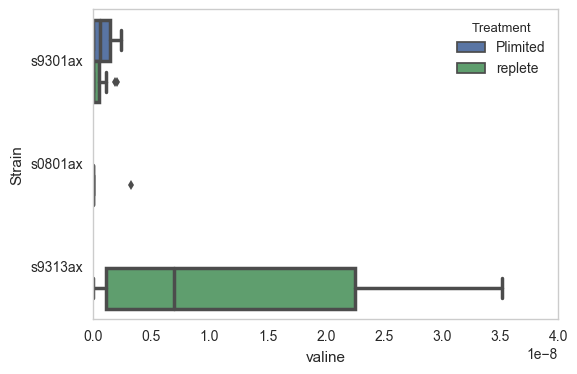

In [8]:
#sns.set_style("whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(x = CSamount['valine'],y = mtabData['Strain'],hue = mtabData['Treatment'],linewidth=2.5)

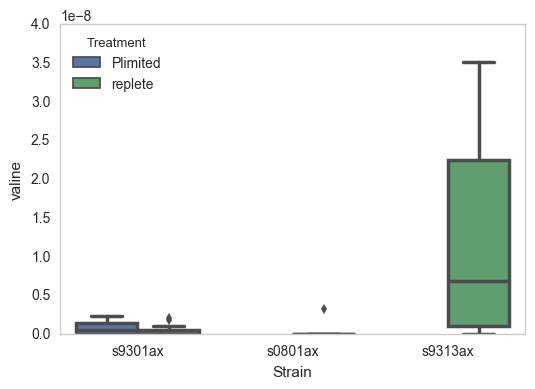

In [9]:
ax = sns.boxplot(y = CSamount['valine'],x = mtabData['Strain'],hue = mtabData['Treatment'],linewidth=2.5)

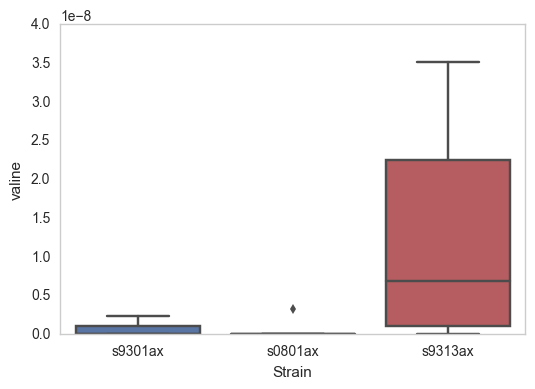

In [10]:
ax = sns.boxplot(x = mtabData['Strain'],y = CSamount['valine'],data = CSamount)

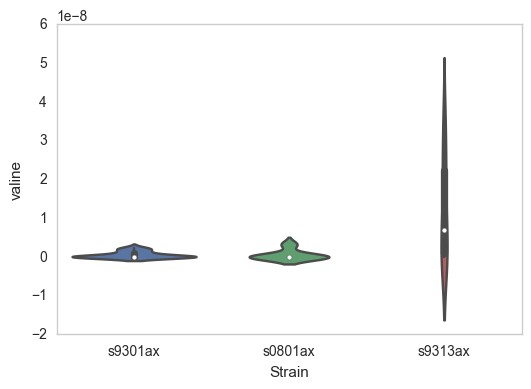

In [11]:
ax = sns.violinplot(x = mtabData['Strain'],y = CSamount['valine'],data = CSamount,orient = 'v')

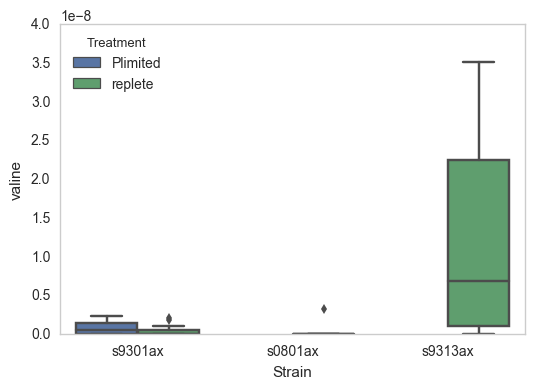

In [12]:
ax = sns.boxplot(x = mtabData['Strain'],y = CSamount['valine'],hue = mtabData['Treatment'],data = CSamount)

(0, 4e-08)

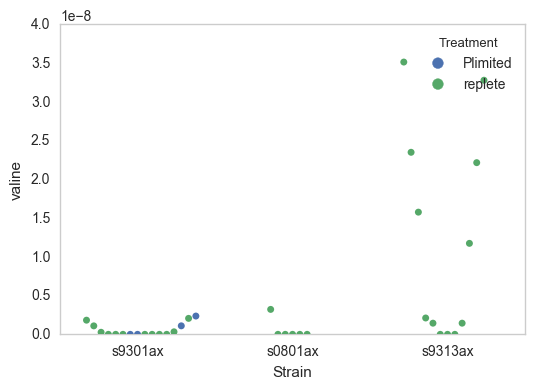

In [13]:
ax = sns.swarmplot(x = mtabData['Strain'],y = CSamount['valine'],hue = mtabData['Treatment'],data = CSamount,orient = 'v')
plt.ylim(0,4e-8) #without this everything will look like 0 bc the scale is off

In [14]:
#really only want to plot the replete samples

In [15]:
x = mtabData[mtabData.loc[:,'Treatment']=='replete']

In [16]:
useIdx = mtabData[mtabData.loc[:,'Treatment']=='replete']

In [17]:
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='filter')]

(0, 4e-08)

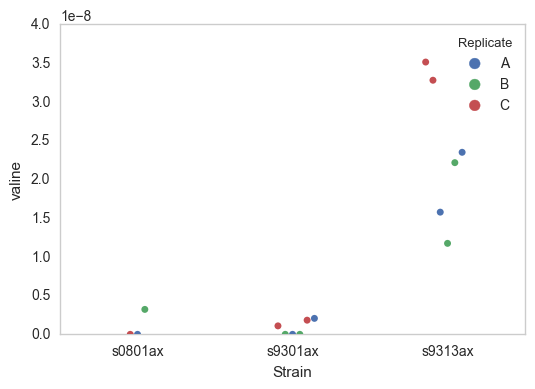

In [18]:
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = CSamount.loc[useIdx.index,'valine'],
                   hue = mtabData.loc[useIdx.index,'Replicate'],data = CSamount,orient = 'v')
plt.ylim(0,4e-8) #without this everything will look like 0 bc the scale is off

In [19]:
# #convert numbers to objects for use with seaborn plotting
# x = mtabData['Light'].apply(lambda x:str(x))

(0, 4e-08)

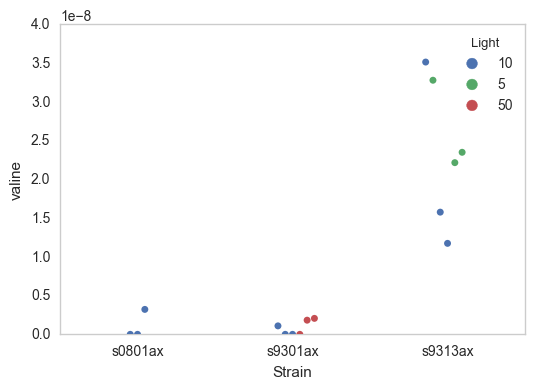

In [20]:
#Python also has issues grouping with numbers
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = CSamount.loc[useIdx.index,'valine'],
                   hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),data = CSamount,orient = 'v')
plt.ylim(0,4e-8) #without this everything will look like 0 bc the scale is off

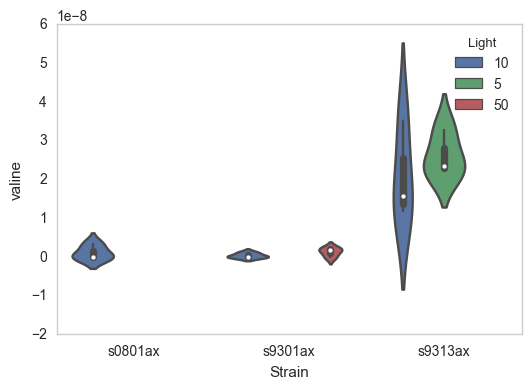

In [21]:
ax = sns.violinplot(x = mtabData.loc[useIdx.index,'Strain'],y = CSamount.loc[useIdx.index,'valine'],
                   hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),data = CSamount,orient = 'v')

(0, 3.6890095394024357e-08)

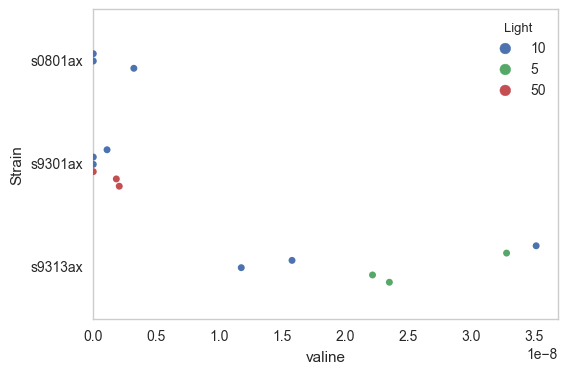

In [22]:
#Python also has issues grouping with numbers
toPlot = CSamount.loc[useIdx.index,'valine']
ax = sns.swarmplot(y = mtabData.loc[useIdx.index,'Strain'],x = toPlot,
                   hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),data = CSamount,orient = 'h')
ma = max(toPlot)
plt.xlim(0,ma*1.05) #without this everything will look like 0 bc the scale is off

(0, 1.7277212930577917e-09)

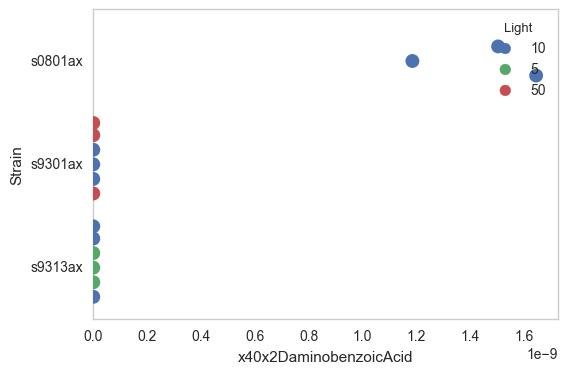

In [23]:
#Python also has issues grouping with numbers
toPlot = CSamount.loc[useIdx.index,mtabNames[5]]
ax = sns.swarmplot(y = mtabData.loc[useIdx.index,'Strain'],x = toPlot,
                   hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                   data = CSamount,orient = 'h',
                  size = 10)
ma = max(toPlot)
plt.xlim(0,ma*1.05) #without this everything will look like 0 bc the scale is off

In [24]:
short = mtabNames[0:6]

In [25]:
short

Index(['x20x2D30x2DdihydroxybenzoicAcid',
       'x20x2D30x2Ddihydroxypropane1sulfonate', 'x30x2DmercaptoProprionate',
       'x30x2Dmethyl0x2D20x2DoxobutanoicAcid',
       'x30x2Dmethyl0x2D20x2DoxopentanoicAcid', 'x40x2DaminobenzoicAcid'],
      dtype='object')

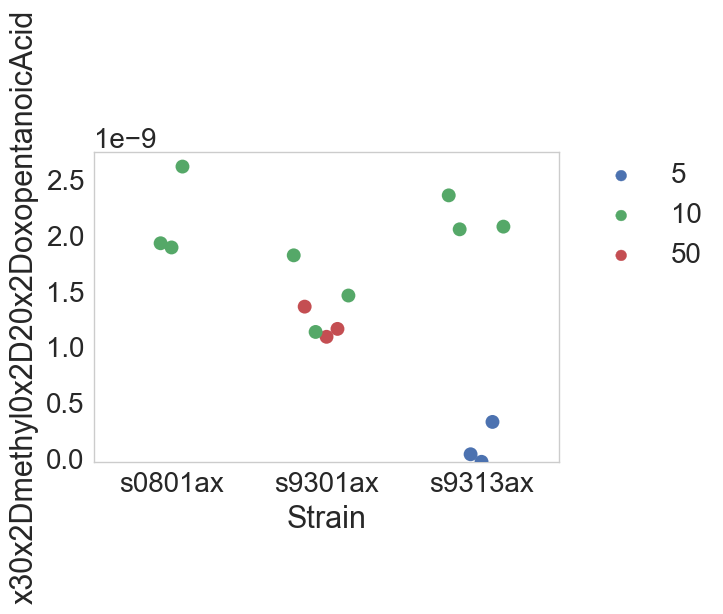

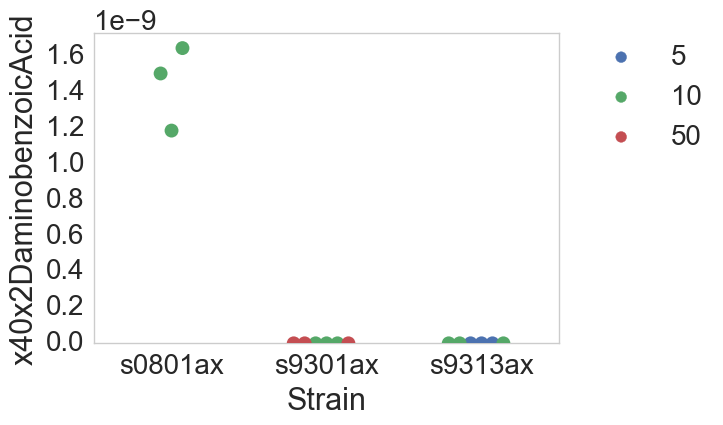

In [31]:
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
for i,item in enumerate(short):
    #Python also has issues grouping with numbers
    
    toPlot = CSamount.loc[useIdx.index,mtabNames[i]]
    if toPlot.sum() != 0:
        fig,ax=plt.subplots(1)
        ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                          hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                          hue_order = ['5','10','50'],size = 10)
        fig.set_size_inches(6,4)

        ma = max(toPlot)
        plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
        # Put the legend out of the figure
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

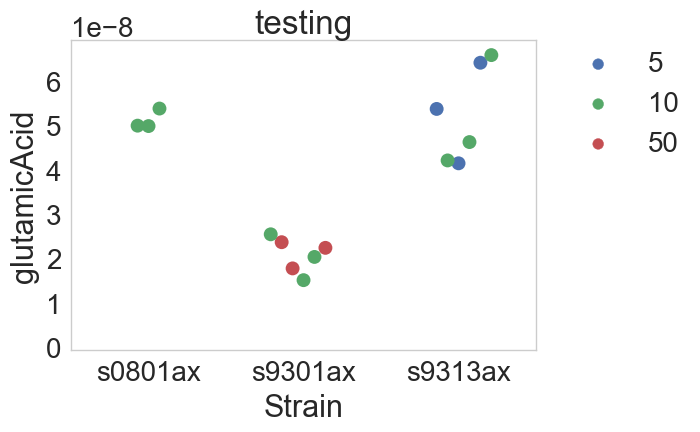

In [69]:
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='filter')]

sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,'glutamicAcid']
if toPlot.sum() != 0:
    fig,ax=plt.subplots(1)
    ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                      hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                      hue_order = ['5','10','50'],size = 10)
    fig.set_size_inches(6,4)

    ma = max(toPlot)
    plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('testing')
    fig.savefig('glutamicAcid.ps',bbox_inches='tight',dpi = 600)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


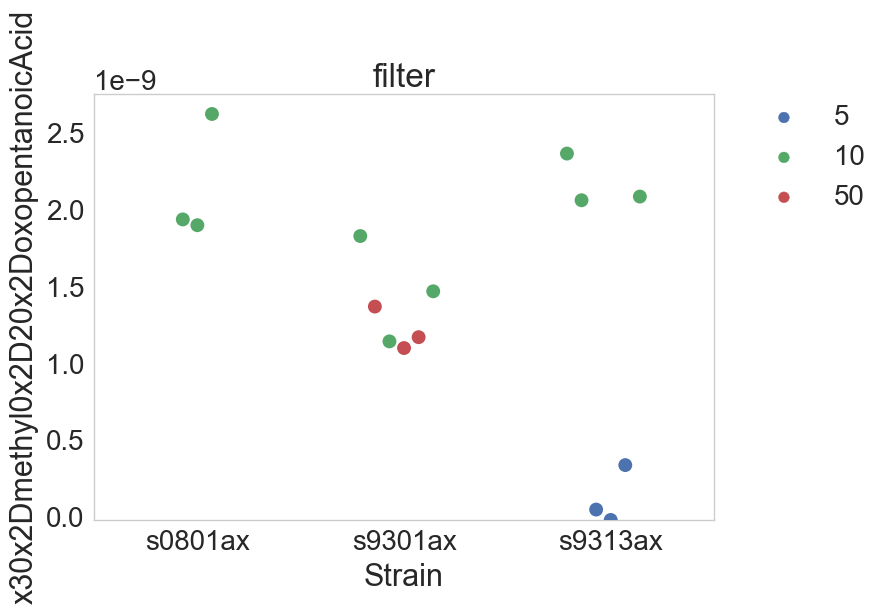

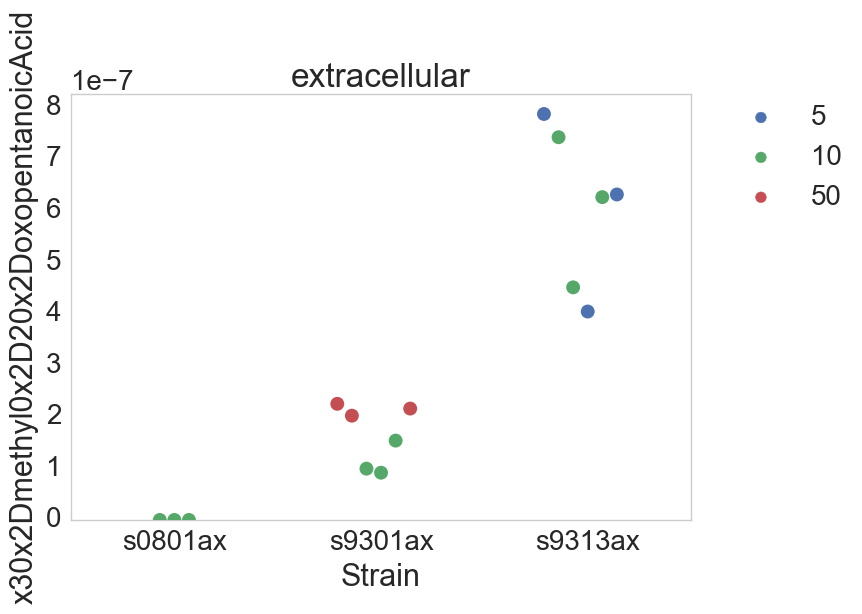

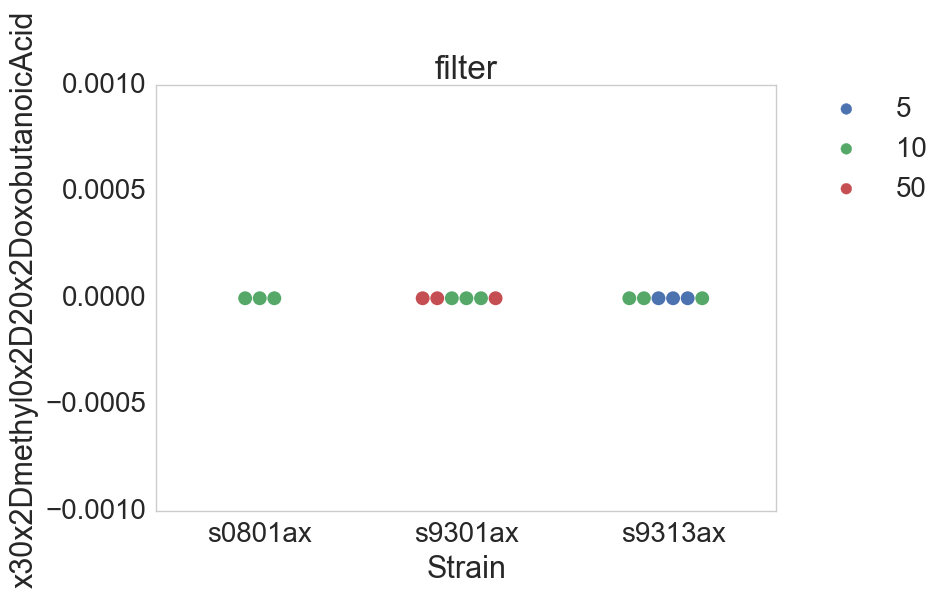

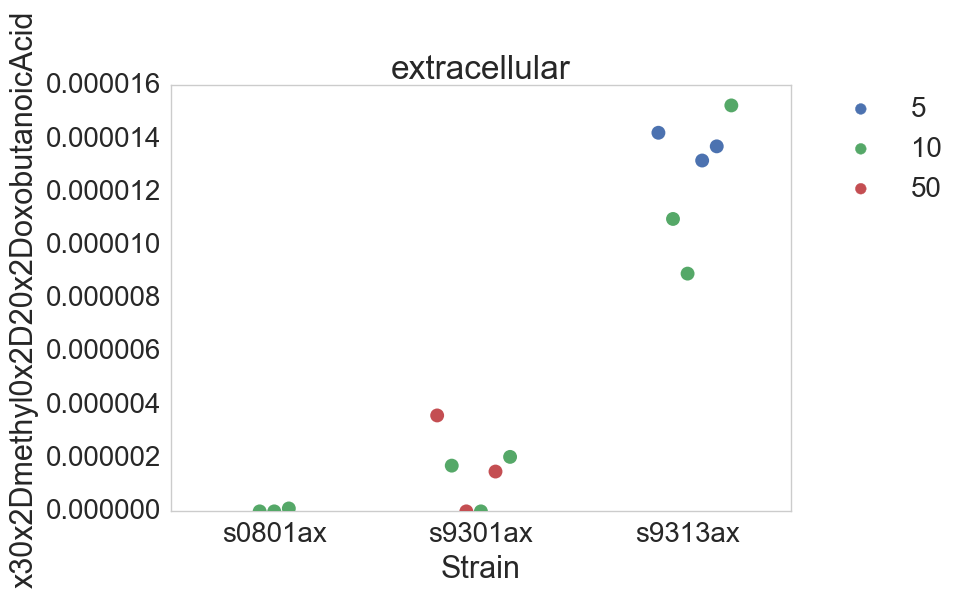

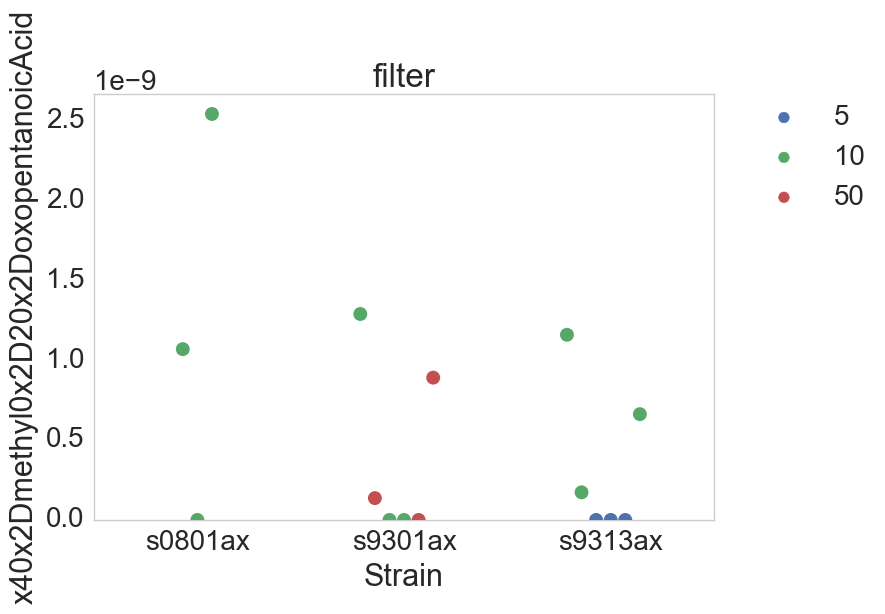

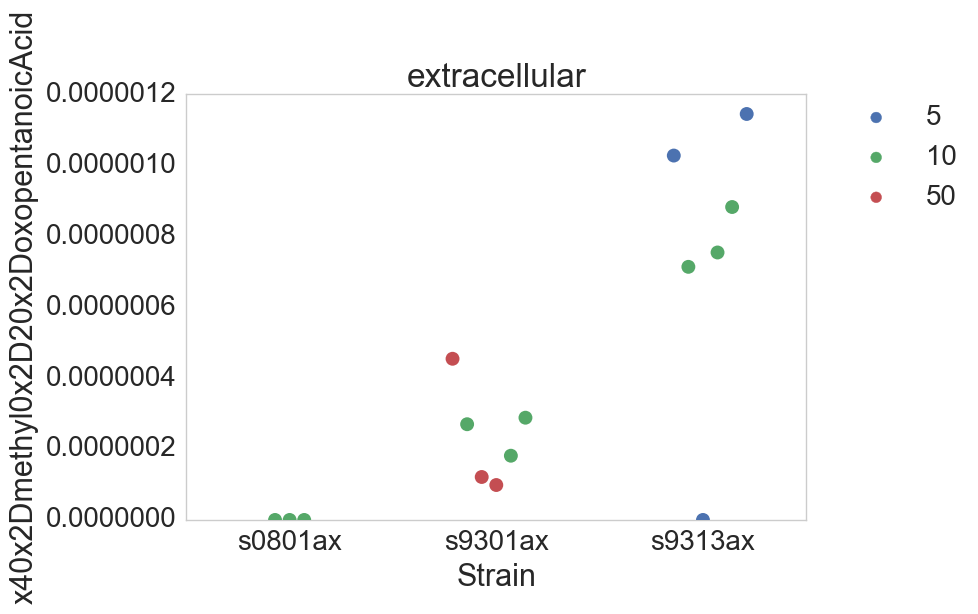

In [70]:
plotOne = 'x30x2Dmethyl0x2D20x2DoxopentanoicAcid'
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='filter')]

sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,plotOne]
fig,ax=plt.subplots(1)
# fig = plt.figure()
# fig.add_subplot(321)
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'],size = 10)
#fig.set_size_inches(6,4)

ma = max(toPlot)
plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('filter')
fig.savefig('figure_filter_3m2op.ps',bbox_inches='tight')
    
    
    
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='extracellular')]
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,plotOne]
fig,ax=plt.subplots(1)
#fig = plt.figure()
# fig.add_subplot(324)
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'],size = 10)
# fig.subplots_adjust(wspace = 1.2)
#fig.set_size_inches(6,4)

ma = max(toPlot)
plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('extracellular')
fig.savefig('figure_extracellular_3m2op.ps',bbox_inches='tight')
   
###move onto the next one of the new acids    
###move onto the next one of the new acids    
###move onto the next one of the new acids    
    
plotOne = 'x30x2Dmethyl0x2D20x2DoxobutanoicAcid'
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='filter')]
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,plotOne]
fig,ax=plt.subplots(1)
# fig = plt.figure()
# fig.add_subplot(321)
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'],size = 10)
#fig.set_size_inches(6,4)

ma = max(toPlot)
plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('filter')
fig.savefig('figure_filter_3m2ob.ps',bbox_inches='tight')
    
    
    
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='extracellular')]
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,plotOne]
fig,ax=plt.subplots(1)
#fig = plt.figure()
# fig.add_subplot(324)
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'],size = 10)
# fig.subplots_adjust(wspace = 1.2)
#fig.set_size_inches(6,4)

ma = max(toPlot)
plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('extracellular')
fig.savefig('figure_extracellular_3m2ob.ps',bbox_inches='tight')
   
###move onto the next one of the new acids    
###move onto the next one of the new acids    
###move onto the next one of the new acids    
    
plotOne = 'x40x2Dmethyl0x2D20x2DoxopentanoicAcid'
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='filter')]
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,plotOne]
fig,ax=plt.subplots(1)
# fig = plt.figure()
# fig.add_subplot(321)
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'],size = 10)
#fig.set_size_inches(6,4)

ma = max(toPlot)
plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('filter')
fig.savefig('figure_filter_4m2op.ps',bbox_inches='tight')
    
    
    
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='extracellular')]
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,plotOne]
fig,ax=plt.subplots(1)
#fig = plt.figure()
# fig.add_subplot(324)
ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'],size = 10)
# fig.subplots_adjust(wspace = 1.2)
#fig.set_size_inches(6,4)

ma = max(toPlot)
plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('extracellular')
fig.savefig('figure_extracellular_4m2op.ps',bbox_inches='tight')

In [ ]:
#Pyton's implementation of grouped bar plots is absurd...here's Seaborn, matplotlib is even worse. Use MATLAB.

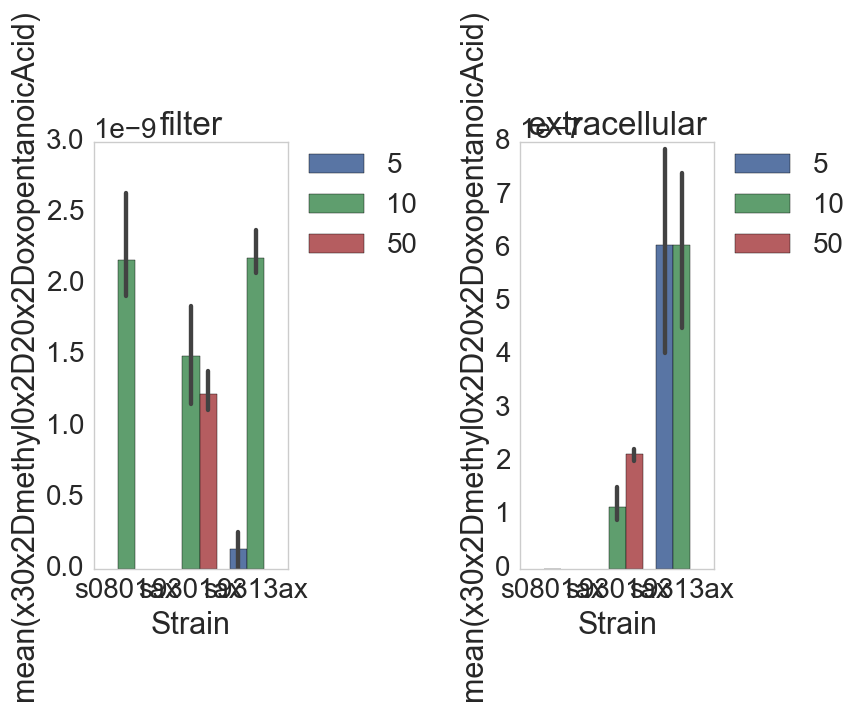

In [85]:
shortList = ['x30x2Dmethyl0x2D20x2DoxopentanoicAcid','x40x2Dmethyl0x2D20x2DoxopentanoicAcid',
             'x30x2Dmethyl0x2D20x2DoxobutanoicAcid']
             

useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='filter')]

toPlot = CSamount.loc[useIdx.index,shortList[0]]

#fig,ax=plt.subplots(1)
fig = plt.figure()
fig.add_subplot(121)

ax = sns.barplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('filter')


useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & (mtabData.loc[:,'SampleInfo'] =='extracellular')]

toPlot = CSamount.loc[useIdx.index,shortList[0]]

#fig,ax=plt.subplots(1)
# fig = plt.figure()
fig.add_subplot(122)

ax = sns.barplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                  hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                  hue_order = ['5','10','50'])
fig.subplots_adjust(wspace = 1.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('extracellular')

In [28]:
#heatmap
corrmat = CSamount.corr()

In [29]:
corrmat

x20x2D30x2DdihydroxybenzoicAcid  \
x20x2D30x2DdihydroxybenzoicAcid                                                 NaN   
x20x2D30x2Ddihydroxypropane1sulfonate                                           NaN   
x30x2DmercaptoProprionate                                                       NaN   
x30x2Dmethyl0x2D20x2DoxobutanoicAcid                                            NaN   
x30x2Dmethyl0x2D20x2DoxopentanoicAcid                                           NaN   
x40x2DaminobenzoicAcid                                                          NaN   
x40x2DhydroxybenzoicAcid                                                        NaN   
x40x2Dmethyl0x2D20x2DoxopentanoicAcid                                           NaN   
x50x270x2DDeoxy0x2D50x270x28methylthio0x29adeno...                              NaN   
AmMP                                                                            NaN   
D0x2Dglucosamine60x2Dphosphate                                                  NaN   
DMSP                                                                            NaN   
GABA                                                                            NaN   
HMP                                                                             NaN   
NADPos                                                                          NaN   
Putrescine                                                                      NaN   
acetyltaurine                                                                   NaN   
adeninePos                                                                      NaN   
adenosine                                                                       NaN   
adenosine50x270x2DmonophosphatePos                                              NaN   
alpha0x2DketoglutaricAcid                                                       NaN   
arginine                                                                        NaN   
asparticAcidPos                                                                 NaN   
betaine                                                                         NaN   
biotinNeg                                                                       NaN   
caffeine                                                                        NaN   
chitobiosePos                                                                   NaN   
chitotriose                                                                     NaN   
choline                                                                         NaN   
ciliatine                                                                       NaN   
...                                                                             ...   
oroticAcid                                                                      NaN   
pantothenicAcidNeg                                                              NaN   
phenylalanine                                                                   NaN   
phosphoenolpyruvate                                                             NaN   
phycocyanobilin                                                                 NaN   
proline                                                                         NaN   
pyridoxine                                                                      NaN   
riboflavin                                                                      NaN   
s0x2D0x2810x2D20x2Ddicarboxyethyl0x29glutathion...                              NaN   
s0x2D0x2850x270x2Dadenosyl0x290x2DL0x2Dhomocyst...                              NaN   
s0x2Dadenosyl0x2DL0x2Dmethionine                                                NaN   
sarcosine                                                                       NaN   
serine                                                                          NaN   
sn0x2Dglycerol30x2DphosphatePos                                                 NaN   
sodiumTaurocholate                                

In [30]:
CSamount.shape

(34, 93)

In [31]:
CSamount.head(5)

x20x2D30x2DdihydroxybenzoicAcid  x20x2D30x2Ddihydroxypropane1sulfonate  \
0                                0                           1.399069e-09   
1                                0                           0.000000e+00   
2                                0                           1.605937e-09   
3                                0                           0.000000e+00   
4                                0                           0.000000e+00   

   x30x2DmercaptoProprionate  x30x2Dmethyl0x2D20x2DoxobutanoicAcid  \
0                          0                          2.435003e-06   
1                          0                          0.000000e+00   
2                          0                          5.387344e-07   
3                          0                          0.000000e+00   
4                          0                          0.000000e+00   

   x30x2Dmethyl0x2D20x2DoxopentanoicAcid  x40x2DaminobenzoicAcid  \
0                                    0.0            0.000000e+00   
1                                    0.0            0.000000e+00   
2                                    0.0            0.000000e+00   
3                                    0.0            0.000000e+00   
4                                    0.0            1.075752e-08   

   x40x2DhydroxybenzoicAcid  x40x2Dmethyl0x2D20x2DoxopentanoicAcid  \
0              1.483915e-07                                    0.0   
1              0.000000e+00                                    0.0   
2              1.540851e-07                                    0.0   
3              0.000000e+00                                    0.0   
4              2.341786e-07                                    0.0   

   x50x270x2DDeoxy0x2D50x270x28methylthio0x29adenosine  AmMP      ...        \
0                                       1.613570e-08       0      ...         
1                                       6.347998e-09       0      ...         
2                                       2.163542e-08       0      ...         
3                                       5.560557e-09       0      ...         
4                                       0.000000e+00       0      ...         

   thiamineMonophosphate  threonine0x28isom0x2EHomoserine0x29  thymidine  \
0                      0                                    0   0.000002   
1                      0                                    0   0.000000   
2                      0                                    0   0.000002   
3                      0                                    0   0.000000   
4                      0                                    0   0.000002   

   tryptamine    tryptophan  uracilPos  uridine50x2DmonophosphatePos  \
0           0  0.000000e+00        0.0                           0.0   
1           0  3.722020e-09        0.0                           0.0   
2           0  0.000000e+00        0.0                           0.0   
3           0  2.662213e-09        0.0                           0.0   
4           0  4.509095e-08        0.0                           0.0   

         valine  xanthinePos  xanthosineNeg  
0  0.000000e+00          0.0            0.0  
1  2.359008e-09          0.0            0.0  
2  0.000000e+00          0.0            0.0  
3  1.096379e-09          0.0            0.0  
4  0.000000e+00          0.0            0.0  

[5 rows x 93 columns]

In [32]:
sfmr = CSamount.sum(axis=0)

In [33]:
getI = sfmr[sfmr>0].index

In [72]:
useIdx = mtabData[(mtabData.loc[:,'Treatment']=='replete') & 
                  (mtabData.loc[:,'SampleInfo'] =='filter')].index
#mtabData.loc[useIdx,:]

In [73]:
tData = CSamount.loc[useIdx,getI]

In [74]:
tData.shape

(15, 49)

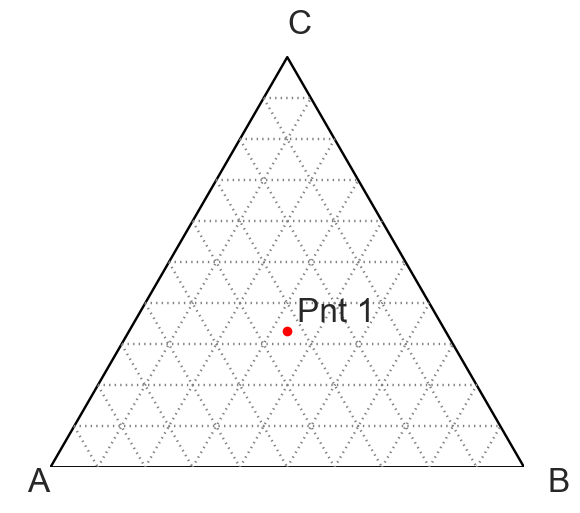

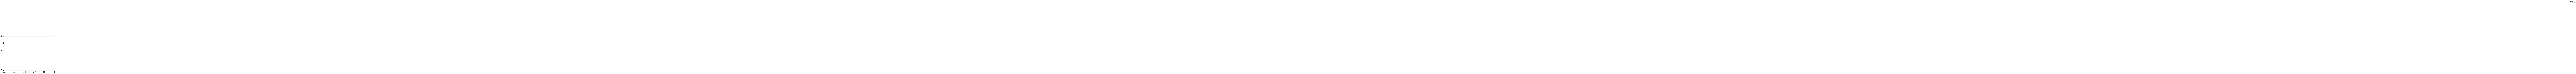

In [41]:
import matplotlib.pyplot as pl
import numpy as np

## Draw outline of equilateral triangle and hide x-y axes
peak=50.*3**0.5
fig=pl.figure(1)
sp1=fig.add_subplot(111,aspect=1)
sp1.plot([0,100,50,0],[0,0,peak,0],color='black')
sp1.text(-5,-5,'A')
sp1.text(105,-5,'B')
sp1.text(50,peak+5,'C')
sp1.axis('off')

## Draw grid on trilinear plot
for i in range(10,100,10):
    sp1.plot([0+i/2.,100-i/2.],[i*peak/100.,i*peak/100],color='grey',linestyle=':')
    sp1.plot([0+i/2.,i],[i*peak/100.,0],color='grey',linestyle=':')
    sp1.plot([i,50+i/2],[0,(100.-i)*peak/100.],color='grey',linestyle=':')


point_data=[[33.33,33.33,33.34],
            [50.,50.,0]]

text=['Pnt 1','Pnt 2']

for i,point in enumerate(point_data):
    x=point[1]+0.5*point[2]
    y=0+(3**.5/2.)*point[2]
    pl.text(x+2,y+2,text[i])
    sp1.plot(x,y,marker='o',color='red')
    pl.show()

In [68]:
CSamount.loc[useIdx,'valine']*1e9

11    0.000000
13    0.000000
15    1.091375
17    2.060100
19    0.000000
21    1.826802
Name: valine, dtype: float64

In [75]:
mtabData.loc[useIdx,:]

Strain  Light Replicate SampleInfo Treatment  CellsFiltered  fgC  \
5   s0801ax     10         A     filter   replete   4.181003e+09   46   
7   s0801ax     10         B     filter   replete   3.119448e+09   46   
9   s0801ax     10         C     filter   replete   3.347216e+09   46   
11  s9301ax     10         A     filter   replete   7.841682e+09   30   
13  s9301ax     10         B     filter   replete   4.871513e+09   30   
15  s9301ax     10         C     filter   replete   5.636915e+09   30   
17  s9301ax     50         A     filter   replete   7.877939e+09   30   
19  s9301ax     50         B     filter   replete   7.216216e+09   30   
21  s9301ax     50         C     filter   replete   6.071740e+09   30   
23  s9313ax      5         A     filter   replete   3.747370e+09  158   
25  s9313ax      5         B     filter   replete   3.705941e+09  158   
27  s9313ax      5         C     filter   replete   2.744918e+09  158   
29  s9313ax     10         A     filter   replete   4.455013e+09  158   
31  s9313ax     10         B     filter   replete   7.217679e+09  158   
33  s9313ax     10         C     filter   replete   4.061381e+09  158   

    totalCcaptured  mlFiltered  extractVol_ul      ...        \
5     1.923262e+11        33.3            150      ...         
7     1.434946e+11        33.4            150      ...         
9     1.539720e+11        32.9            150      ...         
11    2.352505e+11        33.2            150      ...         
13    1.461454e+11        32.9            150      ...         
15    1.691074e+11        33.0            150      ...         
17    2.363382e+11        32.9            150      ...         
19    2.164865e+11        33.6            150      ...         
21    1.821522e+11        32.2            150      ...         
23    5.920844e+11        30.6            150      ...         
25    5.855387e+11        31.0            150      ...         
27    4.336970e+11        29.6            150      ...         
29    7.038921e+11        33.2            150      ...         
31    1.140393e+12        33.1            150      ...         
33    6.416982e+11        33.0            150      ...         

    thiamineMonophosphate  threonine0x28isom0x2EHomoserine0x29  thymidine  \
5                       0                                    0        0.0   
7                       0                                    0        0.0   
9                       0                                    0        0.0   
11                      0                                    0        0.0   
13                      0                                    0        0.0   
15                      0                                    0        0.0   
17                      0                                    0        0.0   
19                      0                                    0        0.0   
21                      0                                    0        0.0   
23                      0                                    0        0.0   
25                      0                                    0        0.0   
27                      0                                    0        0.0   
29                      0                                    0        0.0   
31                      0                                    0        0.0   
33                      0                                    0        0.0   

    tryptamine    tryptophan     uracilPos  uridine50x2DmonophosphatePos  \
5            0  1.446349e-08  0.000000e+00                  0.000000e+00   
7            0  1.612100e-08  0.000000e+00                  0.000000e+00   
9            0  1.509821e-08  0.000000e+00                  0.000000e+00   
11           0  1.332560e-09  0.000000e+00                  0.000000e+00   
13           0  2.328569e-09  0.000000e+00                  0.000000e+00   
15           0  2.223884e-09  0.000000e+00                  0.000000e+00   
17           0  2.177675e-09  0.000000e+00    

In [86]:
point_data = [[CSamount.loc[5,'valine']*1e9,CSamount.loc[11,'valine']*1e9,CSamount.loc[23,'valine']*1e9],
             [CSamount.loc[7,'valine']*1e9,CSamount.loc[13,'valine']*1e9,CSamount.loc[25,'valine']*1e9]]

In [87]:
point_data

[[0.0, 0.0, 23.489073630718504], [3.2178849456403302, 0.0, 22.1521026357319]]

In [88]:
for i,point in enumerate(point_data):
    print(point)

[0.0, 0.0, 23.489073630718504]
[3.2178849456403302, 0.0, 22.1521026357319]


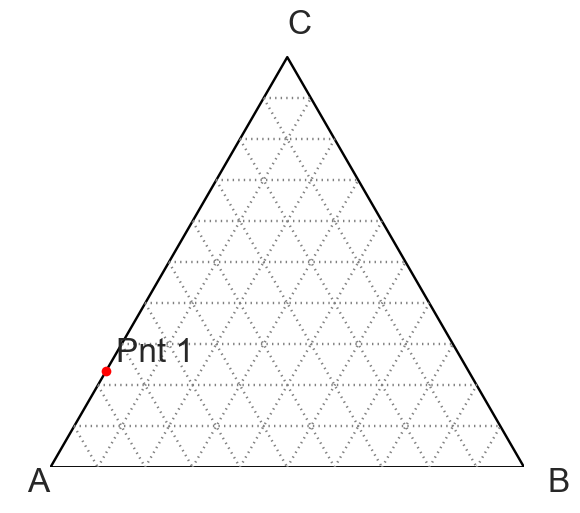

In [89]:
## Draw outline of equilateral triangle and hide x-y axes
peak=50.*3**0.5
fig=pl.figure(1)
sp1=fig.add_subplot(111,aspect=1)
sp1.plot([0,100,50,0],[0,0,peak,0],color='black')
sp1.text(-5,-5,'A')
sp1.text(105,-5,'B')
sp1.text(50,peak+5,'C')
sp1.axis('off')

## Draw grid on trilinear plot
for i in range(10,100,10):
    sp1.plot([0+i/2.,100-i/2.],[i*peak/100.,i*peak/100],color='grey',linestyle=':')
    sp1.plot([0+i/2.,i],[i*peak/100.,0],color='grey',linestyle=':')
    sp1.plot([i,50+i/2],[0,(100.-i)*peak/100.],color='grey',linestyle=':')


# point_data=[[CSamount.loc[useIdx[0],'valine']*1e9,CSamount.loc[useIdx[2],'valine']*1e9,CSamount.loc[useIdx[5],'valine']*1e9],
#             [50.,50.,0]]

text=['Pnt 1','Pnt 2']

for i,point in enumerate(point_data):
    x=point[1]+0.5*point[2]
    y=0+(3**.5/2.)*point[2]
    pl.text(x+2,y+2,text[i])
    sp1.plot(x,y,marker='o',color='red')
    pl.show()

In [66]:
ax1 = fig.add_subplot(131)
ax1b = ax1.twinx()
ax1.fill([100,0,100,100],[0,100,100,0],color = (0.8,0.8,0.8))
ax1.plot([100, 0],[0, 100],'k')
ax1.plot([50, 0, 50, 50],[0, 50, 50, 0],'k--')

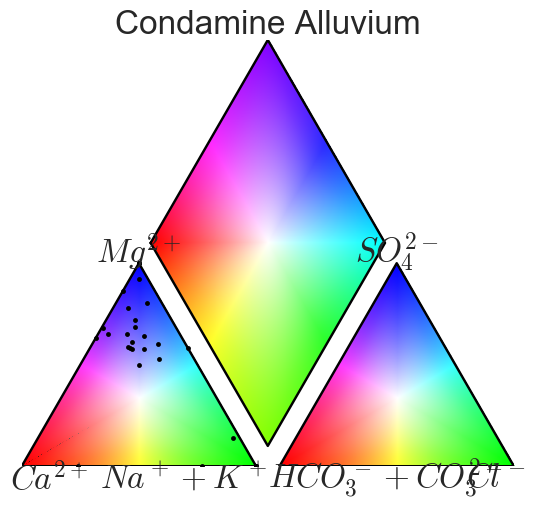

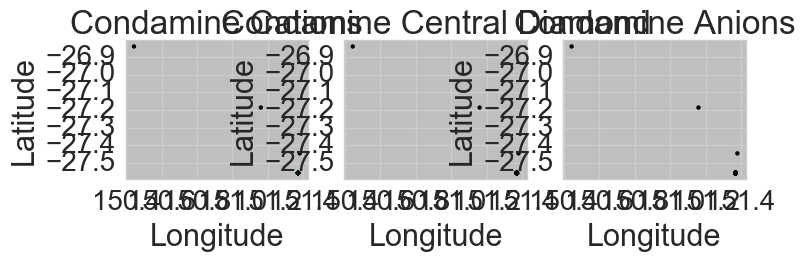

In [101]:
import piper_GW3

In [ ]:
%raise

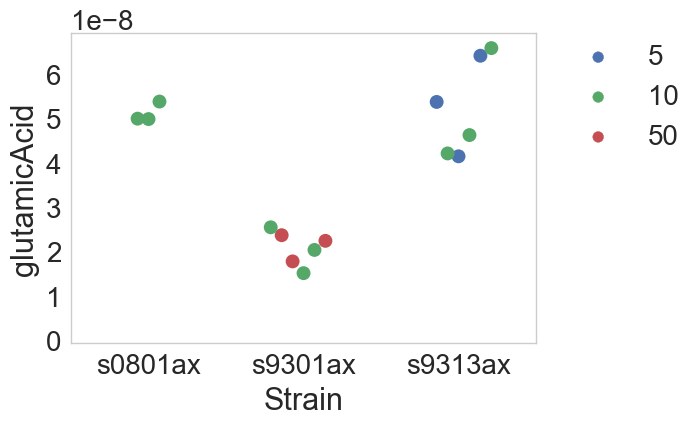

In [33]:
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
toPlot = CSamount.loc[useIdx.index,'glutamicAcid']
if toPlot.sum() != 0:
    fig,ax=plt.subplots(1)
    ax = sns.swarmplot(x = mtabData.loc[useIdx.index,'Strain'],y = toPlot,
                      hue = mtabData.loc[useIdx.index,'Light'].apply(lambda useIdx:str(useIdx)),
                      hue_order = ['5','10','50'],size = 10)
    fig.set_size_inches(6,4)

    ma = max(toPlot)
    plt.ylim(0,ma*1.05) #without this everything will look like 0 bc the scale is off
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.savefig('glutamicAcid.jpg',bbox_inches='tight')